In [1]:
import sys
sys.path.append('/root/code/LLM/LSTM_from_wzw')

import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import math
from utils import *
import argparse
from matplotlib.legend_handler import HandlerLine2D

In [3]:
def plot_loss_acc_1(working_dir):
    fig = plt.figure(figsize=(12, 4), dpi=300)
    format_settings(ms=8, lw=3, left=0.07, right=0.97)
    grid = plt.GridSpec(1, 2)
    # loss 图
    ax1 = fig.add_subplot(grid[0, 0]) 
    train_loss_his = np.load(f'{working_dir}/loss/train_loss_his.npy')
    test_loss_his = np.load(f'{working_dir}/loss/test_loss_his.npy')
    l1, = ax1.semilogy(train_loss_his, label='train loss', color='#C82423', linestyle='-')
    l2, = ax1.semilogy(test_loss_his, label='test loss', color='#2878B5', linestyle='-')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(loc='right', frameon=False)

    # acc 图
    ax2 = fig.add_subplot(grid[0, 1])
    acc_epoch_his = np.load(f'{working_dir}/loss/acc_epoch_his.npy')
    acc_train_unmask_his = np.load(f'{working_dir}/loss/acc_train_unmask_his.npy')
    acc_test_unmask_his = np.load(f'{working_dir}/loss/acc_test_unmask_his.npy')
    handler_map = {}
    color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
    l1, = ax2.plot(acc_epoch_his[::2], acc_train_unmask_his[::2], label=f'train accuracy', color=color_list[0], 
            marker = 'o', markeredgewidth=1, markeredgecolor='black', zorder=6)
    l2, = ax2.plot(acc_epoch_his[::2], acc_test_unmask_his[::2], label=f'test accuracy', color=color_list[1], 
            marker = 'o', markeredgewidth=1, markeredgecolor='black', zorder=5)
    
    handler_map[l1] = HandlerLine2D(numpoints=2)
    handler_map[l2] = HandlerLine2D(numpoints=2)
    handles = [l1, l2]
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend(handler_map=handler_map, handles=handles, loc='right')
    # plt.savefig(f'/root/code/LLM/plot_for_anchor_func/loss_acc/loss.png')
    print(f'loss and acc plot saved to {working_dir}/loss_acc.png')

loss and acc plot saved to /root/code/LLM/LSTM_from_wzw/result/GPT_fprinciple_for_paper_test/3_or_4x_to_x_or_x1-seed_1-N_2000/loss_acc.png


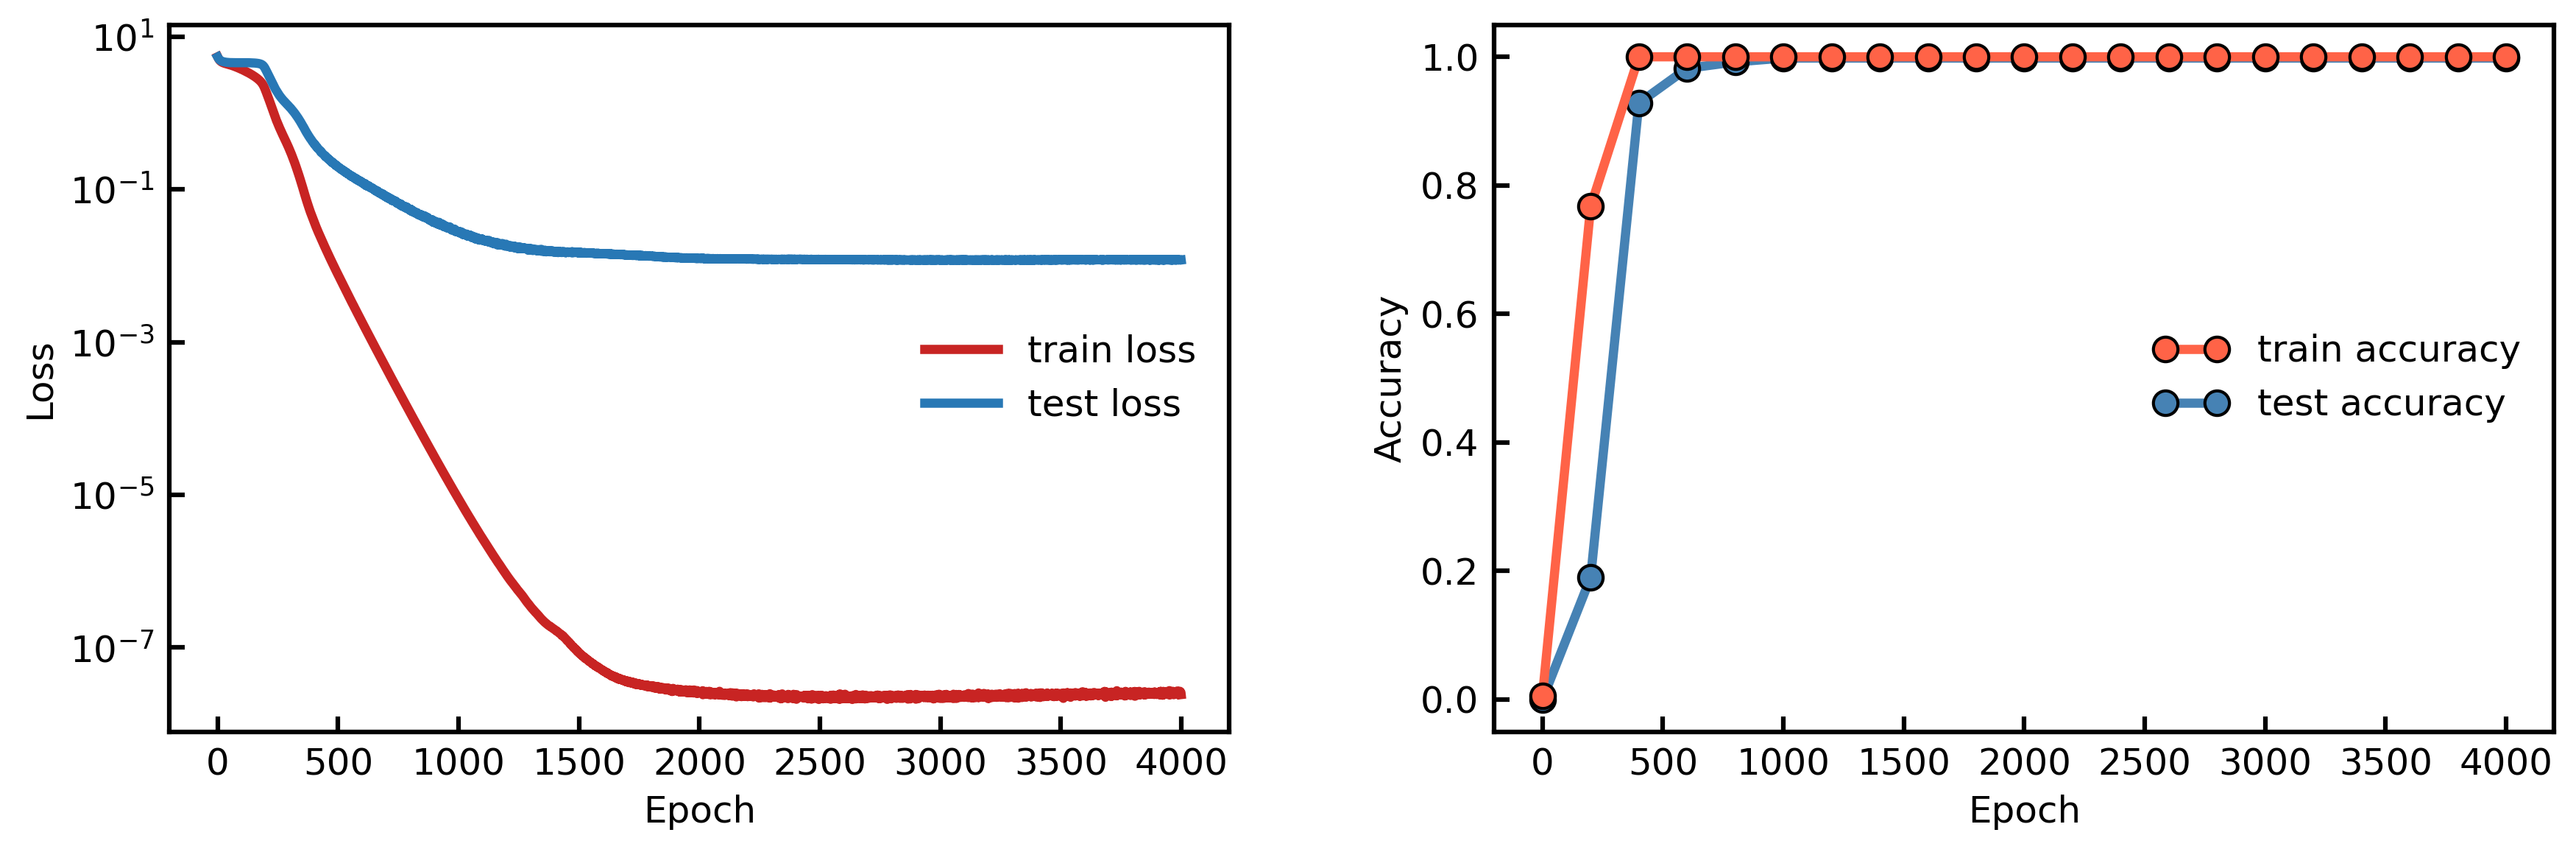

In [4]:
working_dir=r'/root/code/LLM/LSTM_from_wzw/result/GPT_fprinciple_for_paper_test/3_or_4x_to_x_or_x1-seed_1-N_2000'
plot_loss_acc_1(working_dir)

loss and acc plot saved to /root/code/LLM/LSTM_from_wzw/result/GPT_fprinciple_for_paper_test/3_or_4x_to_x-seed_1-N_2000/loss_acc.png


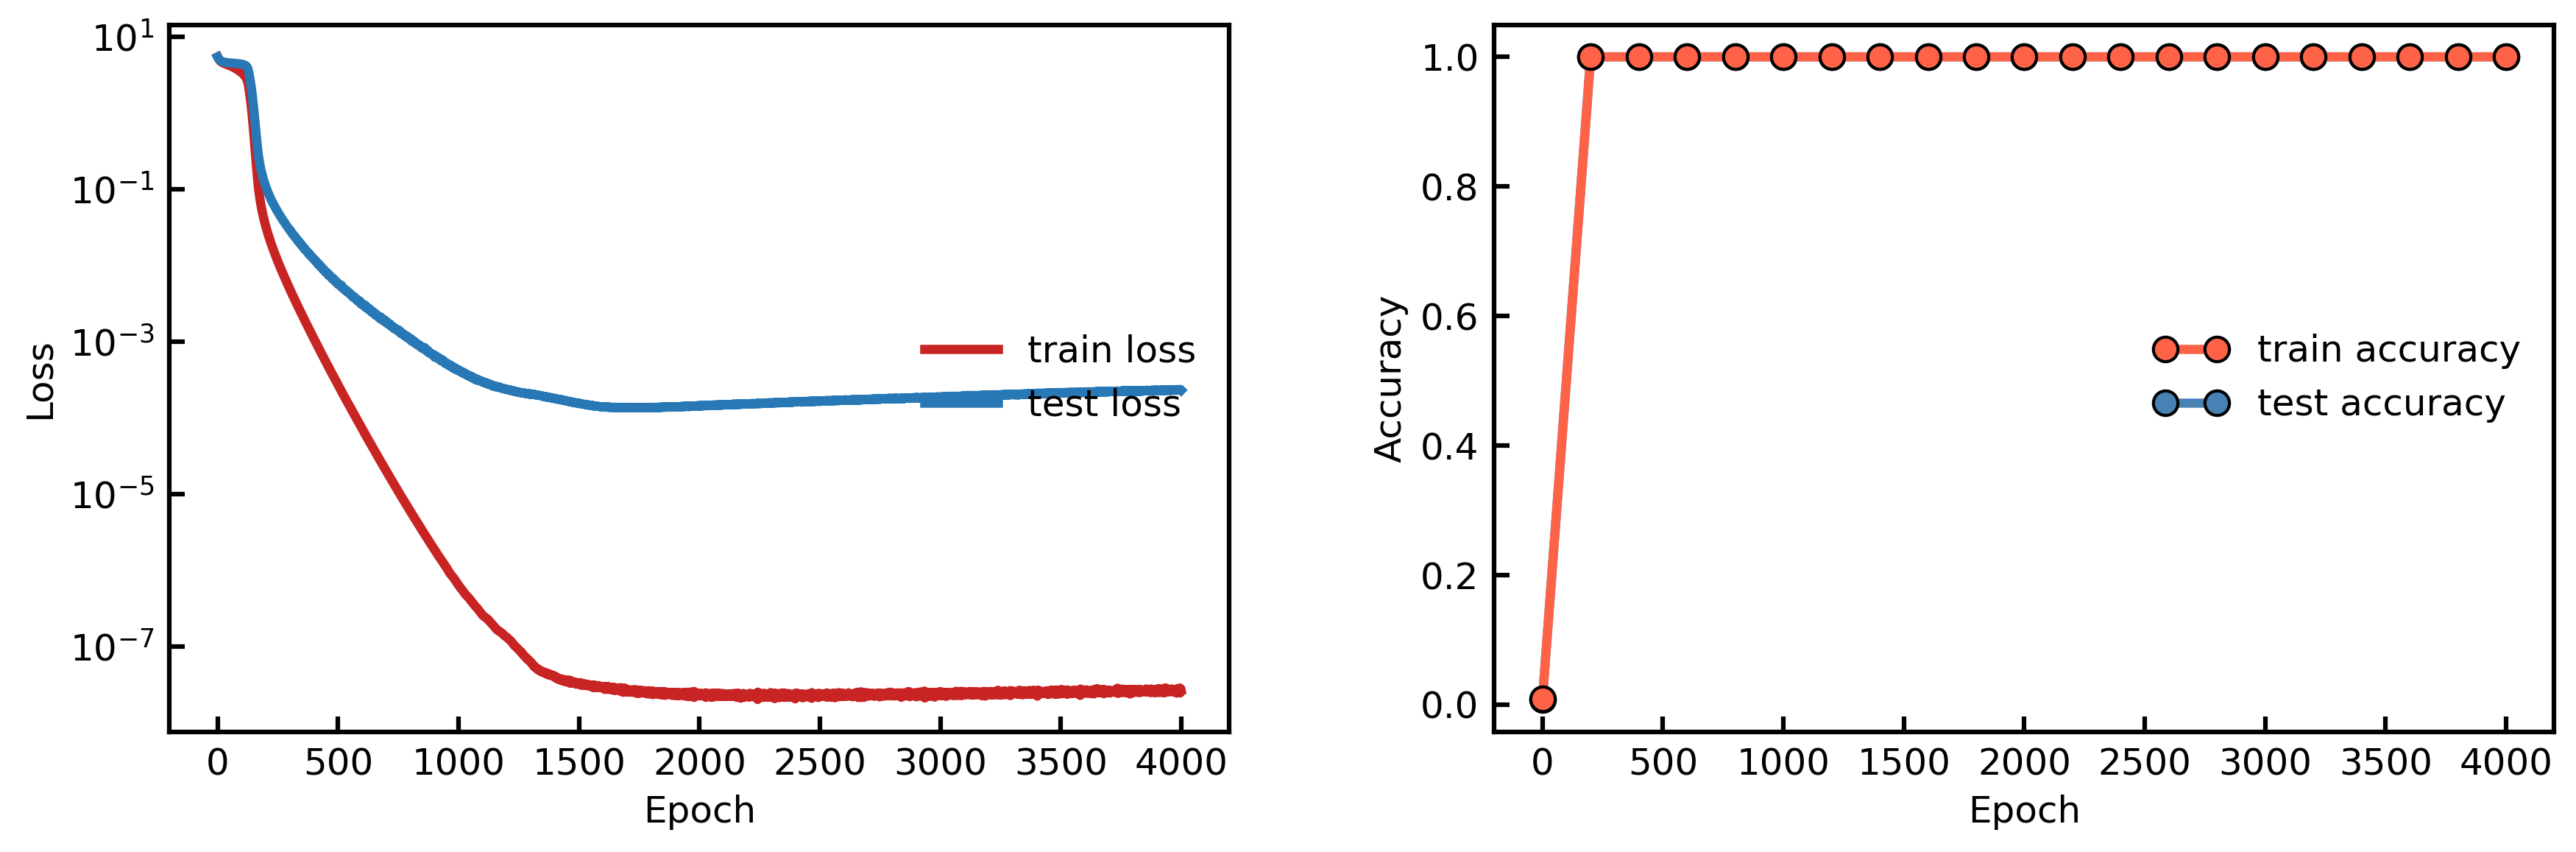

In [5]:
working_dir=r'/root/code/LLM/LSTM_from_wzw/result/GPT_fprinciple_for_paper_test/3_or_4x_to_x-seed_1-N_2000'
plot_loss_acc_1(working_dir)

In [10]:
def plot_loss_acc_1(working_dir1, working_dir2):
    fig = plt.figure(figsize=(12, 4), dpi=300)
    format_settings(ms=8, lw=3, left=0.07, right=0.97)
    grid = plt.GridSpec(1, 2)
    # loss 图
    ax1 = fig.add_subplot(grid[0, 0]) 
    train_loss_his_1 = np.load(f'{working_dir1}/loss/train_loss_his.npy')
    train_loss_his_2 = np.load(f'{working_dir2}/loss/train_loss_his.npy')
    # test_loss_his = np.load(f'{working_dir}/loss/test_loss_his.npy')
    l1, = ax1.semilogy(train_loss_his_1[:1000], label='high frequency task', color='#C82423', linestyle='-')
    l2, = ax1.semilogy(train_loss_his_2[:1000], label='low frequency task', color='#2878B5', linestyle='-')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Training Loss')
    ax1.legend(loc=(0.47, 0.75), frameon=False, )

    # acc 图
    ax2 = fig.add_subplot(grid[0, 1])
    acc_epoch_his = np.load(f'{working_dir2}/loss/acc_epoch_his.npy')
    # acc_train_unmask_his = np.load(f'{working_dir}/loss/acc_train_unmask_his.npy')
    acc_train_unmask_his = np.load(f'{working_dir1}/loss/acc_test_unmask_his.npy')
    acc_test_unmask_his = np.load(f'{working_dir2}/loss/acc_test_unmask_his.npy')
    handler_map = {}
    color_list = ['tomato', 'steelblue', 'lightsalmon', 'skyblue']
    l1, = ax2.plot(acc_epoch_his[:11], acc_train_unmask_his[:11], label=f'high frequency task', color=color_list[0], 
            marker = 'o', markeredgewidth=1, markeredgecolor='black', zorder=6)
    l2, = ax2.plot(acc_epoch_his[:11], acc_test_unmask_his[:11], label=f'low frequency task', color=color_list[1], 
            marker = 'o', markeredgewidth=1, markeredgecolor='black', zorder=5)
    
    handler_map[l1] = HandlerLine2D(numpoints=2)
    handler_map[l2] = HandlerLine2D(numpoints=2)
    handles = [l1, l2]
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Test Accuracy')
    ax2.set_yticks([0.2, 0.6, 1], ['20%', '60%', '100%'])
    ax2.legend(handler_map=handler_map, handles=handles, loc='right')
    plt.savefig(f'/root/code/LLM/plot_for_anchor_func/fprinciple.png')
    print(f'loss and acc plot saved to {working_dir2}/loss_acc.png')

loss and acc plot saved to /root/code/LLM/LSTM_from_wzw/result/GPT_fprinciple_for_paper_test/3_or_4x_to_x-seed_1-N_2000/loss_acc.png


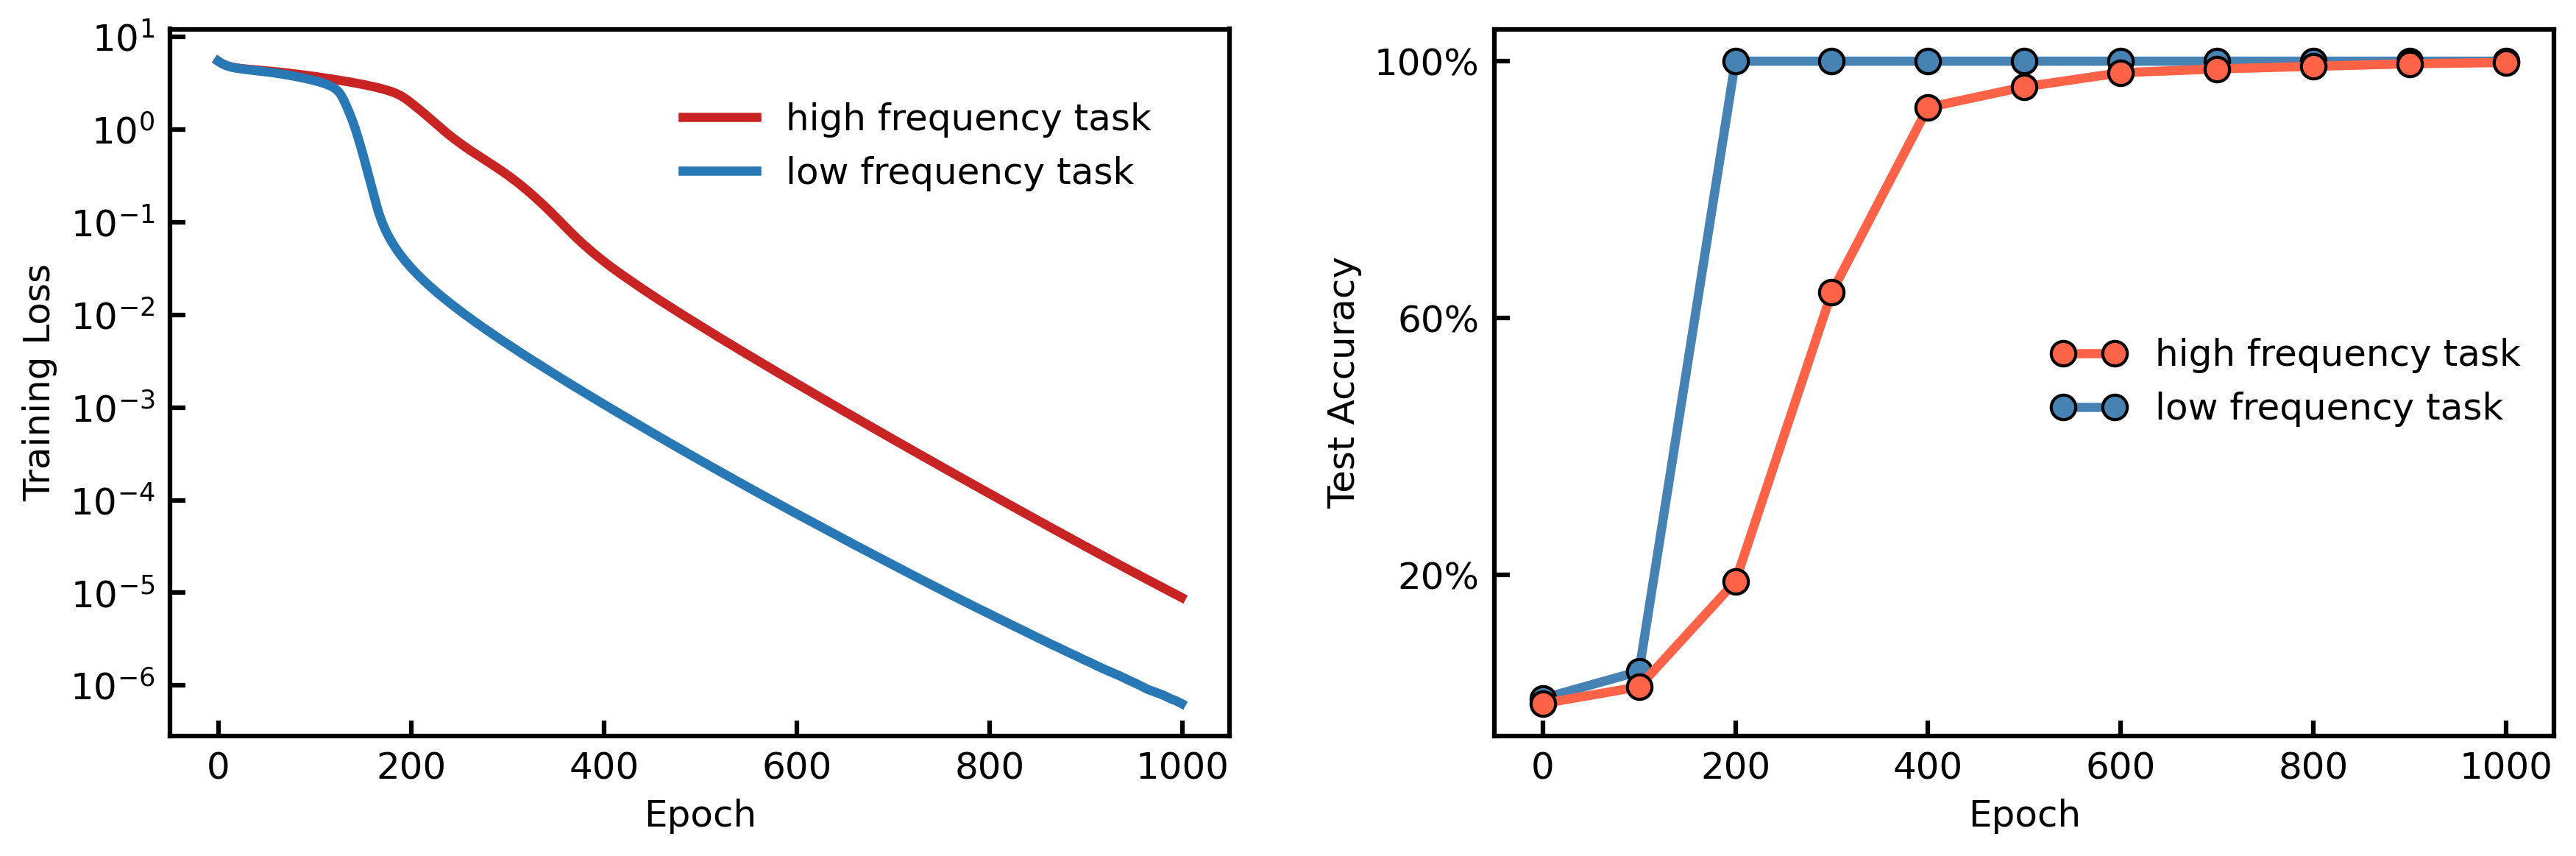

In [11]:
working_dir1=r'/root/code/LLM/LSTM_from_wzw/result/GPT_fprinciple_for_paper_test/3_or_4x_to_x_or_x1-seed_1-N_2000'

working_dir2=r'/root/code/LLM/LSTM_from_wzw/result/GPT_fprinciple_for_paper_test/3_or_4x_to_x-seed_1-N_2000'
plot_loss_acc_1(working_dir1, working_dir2)